# Background

## Spin Weighted Spherical Harmonics

Spin weighted spherical harmonics are a generalization of spherical harmonics whose $\theta$ component satisfies the differential equation shown below. The full spin weighted spherical harmonic, which includes $\phi$ dependence, is given by ${}_s Y_{lm}(\theta) e^{im\phi}$.

\begin{equation}
\left[\frac{1}{\sin \theta} \frac{d}{d \theta}\left(\sin \theta \frac{d}{d \theta}\right)-\frac{(m+s \cos \theta)^2}{\sin ^2 \theta}+s+{ }_s \lambda_{l m}\right]{ }_s Y_{l m}(\theta)=0
\end{equation}

Here, $\theta$ is the polar angle, $\phi$ is the azimuthal angle, $s$ is the spin weight and $l$ and $m$ are the degree and order of the spin weighted spherical harmonic respectively. The spherical eigenvalue ${}_s \lambda_{lm}$ is given by

\begin{equation}
{}_s \lambda_{lm} = l (l+1) - s (s+1)
\end{equation}

Spin weighted spherical harmonics are defined for any integer or half-integer spin weight. For a given spin weight $s$, the values of $l$ and $m$ must satisfy $l \geq |s|$, $l-s \in \mathbb{Z}$ and $m \in \{-l, -l+1,\dots,l-1,l\}$. When the spin weight is 0, spin weighted spherical harmonics simplify to ordinary spherical harmonics. By convention, spin weighted spherical harmonics are normalized so that they satisfy the following orthogonality condition.

\begin{equation}
2\pi\int_0^\pi {}_s Y_{l m}(\theta) {}_s\bar{Y}_{l^{\prime} m^{\prime}}(\theta) \sin{\theta} d\theta = \delta_{l l^{\prime}} \delta_{m m^{\prime}}
\end{equation}

`spheroidal` computes spin weighted spherical harmonics using the following formula from [(Goldberg et. al, 1967)](https://pubs.aip.org/aip/jmp/article-abstract/8/11/2155/380433/Spin-s-Spherical-Harmonics-and)

\begin{equation}
\small
\begin{aligned}
{ }_s Y_{l m}(\theta, \phi)=(-1)^{l+m-s} &\sqrt{\frac{(l+m) !(l-m) !(2 l+1)}{4 \pi(l+s) !(l-s) !}} \sin ^{2 l}\left(\frac{\theta}{2}\right) e^{i m \phi} \\
& \times \sum_{r=0}^{l-s}(-1)^r\left(\begin{array}{c}
l-s \\
r
\end{array}\right)\left(\begin{array}{c}
l+s \\
r+s-m
\end{array}\right) \cot ^{2 r+s-m}\left(\frac{\theta}{2}\right)
\end{aligned}
\end{equation}

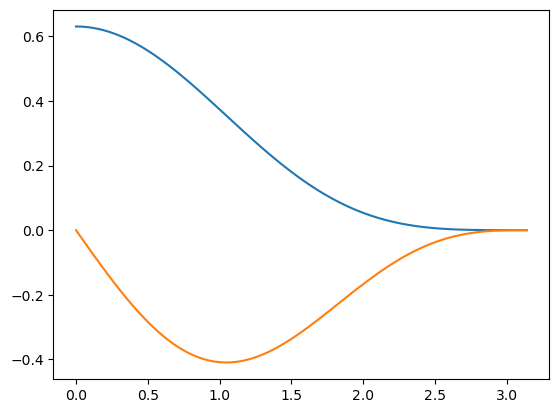

In [2]:
import spheroidal
import matplotlib.pyplot as plt
import numpy as np
from math import pi

# Compute the spin weighted spherical harmonic with s=-2, l=2, m=2 and its derivative
Y = spheroidal.sphericalY(-2,2,2)
dY = spheroidal.sphericalY_deriv(-2,2,2)

# Plot both as a function of theta at phi=0
theta = np.linspace(0,pi,100)
plt.plot(theta, Y(theta,0))
plt.plot(theta, dY(theta,0))

plt.show()

## Spin Weighted Spheroidal Harmonics

Spin weighted spheroidal harmonics are a generalization of spin weighed spherical harmonics. They are defined as solutions to the angular Teukolsky equation, which is obtained from the Teukolsky master equation via separation of variables in the frequency domain. The $\theta$ dependent portion of this equation is shown below. As with spin weighted spherical harmonics, the full spin weighted spheroidal harmonic is given by ${}_s S_{lm}^\gamma(\theta) e^{im\phi}$.

\begin{equation}
\small
\left[\frac{1}{\sin \theta} \frac{d}{d \theta}\left(\sin \theta \frac{d}{d \theta}\right)+\gamma^2 \cos ^2 \theta-\frac{(m+s \cos \theta)^2}{\sin ^2 \theta}-2 \gamma s \cos \theta+s+{ }_s A_{l m}\right]{ }_s S_{l m}^\gamma(\theta)=0
\end{equation}

Here, $\gamma$ is a complex value representing the spheroidicity and ${}_s A_{lm}$ is the separation constant of the Teukolsky master equation, which is related to the spheroidal eigenvalue ${}_s \lambda_{lm}$ by the following equation.

\begin{equation}
{}_s \lambda_{lm} = {}_s A_{lm} + \gamma^2 - 2m\gamma
\end{equation}

As $\gamma \rightarrow 0$, this simplifies to the spherical case in equation (1) and the separation constant ${}_s A_{lm}$ becomes $l(l+1)-s(s+1)$. Spin weighted spheroidal harmonics obey the same orthogonality condition as spin weighted spherical harmonics.

### Spherical Expansion Method

One method of computing spin weighted spheroidal harmonics is to expand them in terms of spin weighted spherical harmonics.

\begin{equation}
{}_s S_{lm}^\gamma(\theta) = \sum_{j=l_{\text{min}}}^\infty b_{j}\, {}_sY_{jm}(\theta)
\end{equation}

Here, $l_{\text{min}} = \text{max}(|s|,|m|)$. The coefficients $b_j$ are called spherical spheroidal mixing coefficients. Substituting equation (7) into equation (5) and simplifying using equation (1) yields

\begin{equation}
\sum_{j=l_{\text{min}}}^\infty b_j (-\gamma^2\cos^2{\theta}+2\gamma s\cos{\theta}+j(j+1)-s(s+1))|sjm\rangle = {}_s A_{lm} \sum_{j=l_{\text{min}}}^\infty b_j|sjm\rangle
\end{equation}

To simplify the notation, the spin weighted spherical harmonics ${}_s Y_{jm}(\theta)$ have been rewritten in Dirac notation as the kets $|sjm\rangle$. Multiplying both sides of this equation by $\langle slm|$ turns this into a matrix equation. The resulting inner products can be simplified using the orthogonality condition in equation (3) and the identities below.

\begin{equation}
\begin{aligned}
c_{j,l}^1 = \langle s l m|\cos \theta| s j m\rangle & =\sqrt{\frac{2 l+1}{2 j+1}}\langle l, m\, ; \,1,0 \mid j, m\rangle\langle l,-s\, ; \,1,0 \mid j,-s\rangle, \\
c_{j,l}^2 = \left\langle s l m\left|\cos ^2 \theta\right| s j m\right\rangle & =\frac{1}{3} \delta_{l j}+\frac{2}{3} \sqrt{\frac{2 l+1}{2 j+1}}\langle l, m\, ; \,2,0 \mid j, m\rangle\langle l,-s\, ; \,2,0 \mid j,-s\rangle,
\end{aligned}
\end{equation}

Further simplification is achieved using the fact that all of the clebsch-gordan coefficients above vanish when $|j-l|>2$. The final result is the eigenvalue equation $\mathbb{K}b = {}_s A_{lm} b$ where $b$ is the vector of mixing coefficients and $\mathbb{K}$ is a pentadiagonal matrix with the following entries.

\begin{equation}
\mathbb{K}_{ij} = 
\begin{cases}
-\gamma^2 c_{l-2,l}^2 & j = i-2\\
-\gamma^2 c_{l-1,l}^2+2s\gamma c_{l-1,l}^1 & j = i-1\\
-\gamma^2 c_{l,l}^2 + 2s\gamma c_{l,l}^1 + l(l+1) - s(s+1) & i = j\\
-\gamma^2 c_{l+1,l}^2+2s\gamma c_{l+1,l}^1 & j = i+1\\
-\gamma^2 c_{l+2,l}^2 & j = i+2
\end{cases}
\end{equation}

In this equation, the index variable $l$ is defined as $l = i+\text{max}(|s|,|m|) - 1$. `spheroidal` provides the [`spectral_matrix_bands()`](spheroidal.spherical.spectral_matrix_bands) function for computing the diagonal bands of this matrix and the [`spectral_matrix_complex()`](spheroidal.spherical.spectral_matrix_complex) function for computing the full matrix. Note that this matrix is always symmetric but not hermitian if $\gamma$ is complex.

In [5]:
%precision 3
s, l, m, g = -2, 2, 2, 1.5
spheroidal.spectral_matrix_bands(s,m,g, num_terms=5)

array([[-1.179,  7.25 , 15.988, 26.312, 38.484],
       [-2.324, -2.721, -2.849, -2.905, -2.935],
       [-0.24 , -0.359, -0.424, -0.462, -0.486]])

In [6]:
%precision 3
spheroidal.spectral_matrix_complex(s,m,g, order=5)

array([[-1.179+0.j, -2.324+0.j, -0.24 +0.j,  0.   +0.j,  0.   +0.j],
       [-2.324+0.j,  7.25 +0.j, -2.721+0.j, -0.359+0.j,  0.   +0.j],
       [-0.24 +0.j, -2.721+0.j, 15.988+0.j, -2.849+0.j, -0.424+0.j],
       [ 0.   +0.j, -0.359+0.j, -2.849+0.j, 26.312+0.j, -2.905+0.j],
       [ 0.   +0.j,  0.   +0.j, -0.424+0.j, -2.905+0.j, 38.484+0.j]])

The separation constants ${}_s A_{lm}$ can be computed using the [separation_constants()](spheroidal.spherical.separation_constants) function.

In [7]:
spheroidal.separation_constants(s,m,g, num_terms=5)

array([-1.828,  7.039, 16.049, 26.451, 39.144])

The mixing coefficients $b_j$ can be computed using the [mixing_coefficients()](spheroidal.spherical.mixing_coefficients) function.

In [8]:
spheroidal.mixing_coefficients(s,l,m,g, num_terms=5)

array([0.963, 0.263, 0.055, 0.009, 0.001])

### Leaver's Method

An alternative way of computing spin weighted spheroidal harmonics is using the method described in [(Leaver, 1985)](https://www.edleaver.com/Misc/EdLeaver/Publications/AnalyticRepresentationForQuasinormalModesOfKerrBlackHoles.pdf). This method begins by defining $k_1=\frac{1}{2}|m-s| \text { and } k_2=\frac{1}{2}|m+s|$ which are used to construct the recurrence coefficients below.

\begin{equation}
\begin{aligned}
\alpha_n^\theta= & -2(n+1)\left(n+2 k_1+1\right) \\
\beta_n^\theta= & n(n-1)+2 n\left(k_1+k_2+1-2 a \omega\right) \\
& \quad-\left[2 a \omega\left(2 k_1+s+1\right)-\left(k_1+k_2\right)\left(k_1+k_2+1\right)\right]-\left[a^2 \omega^2+s(s+1)+ {}_s A_{l m}\right] \\
\gamma_n^\theta= & 2 a \omega\left(n+k_1+k_2+s\right)
\end{aligned}
\end{equation}

The separation constants ${}_s A_{lm}$ are then given by the roots of the following continued fraction.

\begin{equation}
0=\beta_0^\theta-\frac{\alpha_0^\theta \gamma_1^\theta}{\beta_1^\theta-} \frac{\alpha_1^\theta \gamma_2^\theta}{\beta_2^\theta-} \frac{\alpha_2^\theta \gamma_3^\theta}{\beta_3^\theta-\ldots}
\end{equation}

The [continued_fraction()](spheroidal.leaver.continued_fraction) and [continued_fraction_deriv()](spheroidal.leaver.continued_fraction_deriv) functions are used to compute this continued fraction and its derivative. The roots are then found using Newton's method, using an initial guess from the spherical expansion method.

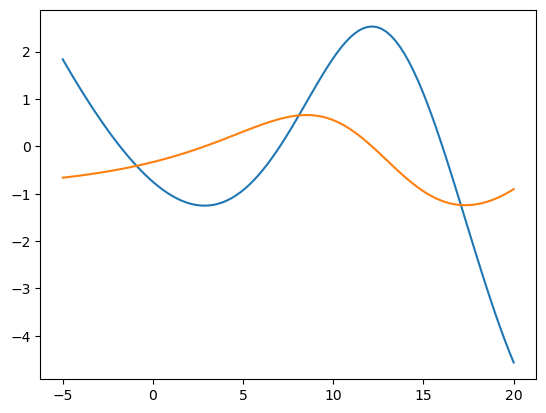

In [19]:
A = np.linspace(-5,20,100)

plt.plot(A, [spheroidal.continued_fraction(a, s, l, m, g) for a in A])
plt.plot(A, [spheroidal.continued_fraction_deriv(a, s, l, m, g) for a in A])

plt.show()

The spin weighted spheroidal harmonics themselves are constructed using a Frobenius expansion.

\begin{equation}
S_{l m}(u)=e^{a \omega u}(1+u)^{k_1}(1-u)^{k_2} \sum_{n=0}^{\infty} a_n(1+u)^n
\end{equation}

Here, $u = \cos{\theta}$ and the coefficients $a_n$ are generated by the following set of recurrence relations.

\begin{equation}
\begin{aligned}
a_1 & = -\frac{\beta_0^\theta}{\alpha_0^\theta}  a_0 \\
a_{n+1} & = -\frac{\beta_n^\theta a_n+\gamma_n^\theta a_{n-1}}{\alpha_n^\theta}
\end{aligned}
\end{equation}

`spheroidal` generates these coefficients starting from $a_0 = 1$ and then normalizes the entire array of coefficients so that the spheroidal harmonic satisfies the orthogonality condition in equation (3). The complex phase of the coefficients is determined by enforcing continuity with the spin weighted spherical harmonics as $\gamma \rightarrow 0$. The [leaver_coefficients()](spheroidal.leaver.leaver_coefficients) function returns this normalized array of coefficients.

In [23]:
spheroidal.leaver_coefficients(-2,2,2,1.5, num_terms=10)

array([ 2.815e-01+0.j, -1.526e-01+0.j,  6.967e-02+0.j, -2.748e-02+0.j,
        9.550e-03+0.j, -2.966e-03+0.j,  8.334e-04+0.j, -2.137e-04+0.j,
        5.043e-05+0.j, -1.102e-05+0.j])